In [464]:
!pip install optuna-integration[keras]

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime  import datetime as dt
import re
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, mean_absolute_error

from subprocess import check_output
from keras.layers import Dense, Activation, Dropout,LSTM
from keras.layers import LSTM, SimpleRNN, GRU
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler



import optuna
import neptune.integrations.optuna as optuna_utils
import tensorflow as tf
from tensorflow import keras
import neptune.new as neptune
import numpy as np
from optuna.integration import KerasPruningCallback
from optuna.integration import KerasPruningCallback
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
import os

In [466]:
path = 'C:\\Users\\User\\Desktop\\Data_Science\\TimeSeries\Currency'

In [467]:
byn_usd_path = os.path.join(path, 'BYN_USD Historical Data.csv')
eur_byn_path = os.path.join(path, 'Прошлые данные - EUR_BYN.csv')
rub_byn_path = os.path.join(path, 'Прошлые данные - RUB_BYN.csv')
rub_usd_path = os.path.join(path, 'RUB_USD Historical Data.csv')
rub_pdf_path = os.path.join(path, 'Курс RUB.pdf') 
curr_path = os.path.join(path, 'curr.csv') 

In [468]:
df = pd.read_csv(byn_usd_path)

In [469]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2024,0.3056,0.3039,0.3056,0.3038,NaN,0.56%
1,11/10/2024,0.3039,0.3039,0.3039,0.3039,NaN,-0.40%
2,11/08/2024,0.3051,0.3056,0.3059,0.3056,NaN,0.03%
3,11/07/2024,0.3050,0.3056,0.3058,0.3056,NaN,0.00%
4,11/06/2024,0.3050,0.3056,0.3058,0.3056,NaN,0.00%
...,...,...,...,...,...,...,...
1787,01/05/2018,0.5012,0.5010,0.5046,0.5000,NaN,-0.18%
1788,01/04/2018,0.5021,0.5040,0.5057,0.5021,NaN,-0.22%
1789,01/03/2018,0.5032,0.5038,0.5071,0.5032,NaN,-0.73%
1790,01/02/2018,0.5069,0.5069,0.5069,0.5069,NaN,0.00%


In [470]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [471]:
df['Price'] = 1/df['Price'] 
df['Open'] = 1/df['Open'] 
df['High'] = 1/df['High'] 
df['Low'] = 1/df['Low'] 
 


In [472]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2024,3.272251,3.290556,3.272251,3.291639,NaN,0.56%
1,11/10/2024,3.290556,3.290556,3.290556,3.290556,NaN,-0.40%
2,11/08/2024,3.277614,3.272251,3.269042,3.272251,NaN,0.03%
3,11/07/2024,3.278689,3.272251,3.270111,3.272251,NaN,0.00%
4,11/06/2024,3.278689,3.272251,3.270111,3.272251,NaN,0.00%
...,...,...,...,...,...,...,...
1787,01/05/2018,1.995211,1.996008,1.981768,2.000000,NaN,-0.18%
1788,01/04/2018,1.991635,1.984127,1.977457,1.991635,NaN,-0.22%
1789,01/03/2018,1.987281,1.984915,1.971998,1.987281,NaN,-0.73%
1790,01/02/2018,1.972776,1.972776,1.972776,1.972776,NaN,0.00%


In [473]:
df['Date'] = pd.to_datetime(df['Date'])

In [474]:
df_sort = df.sort_values('Date')

In [475]:
df_sort

,Date,Price,Open,High,Low,Vol.,Change %
1791,2018-01-01,1.972776,1.972776,1.972776,1.972776,NaN,0.00%
1790,2018-01-02,1.972776,1.972776,1.972776,1.972776,NaN,0.00%
1789,2018-01-03,1.987281,1.984915,1.971998,1.987281,NaN,-0.73%
1788,2018-01-04,1.991635,1.984127,1.977457,1.991635,NaN,-0.22%
1787,2018-01-05,1.995211,1.996008,1.981768,2.000000,NaN,-0.18%
...,...,...,...,...,...,...,...
4,2024-11-06,3.278689,3.272251,3.270111,3.272251,NaN,0.00%
3,2024-11-07,3.278689,3.272251,3.270111,3.272251,NaN,0.00%
2,2024-11-08,3.277614,3.272251,3.269042,3.272251,NaN,0.03%
1,2024-11-10,3.290556,3.290556,3.290556,3.290556,NaN,-0.40%


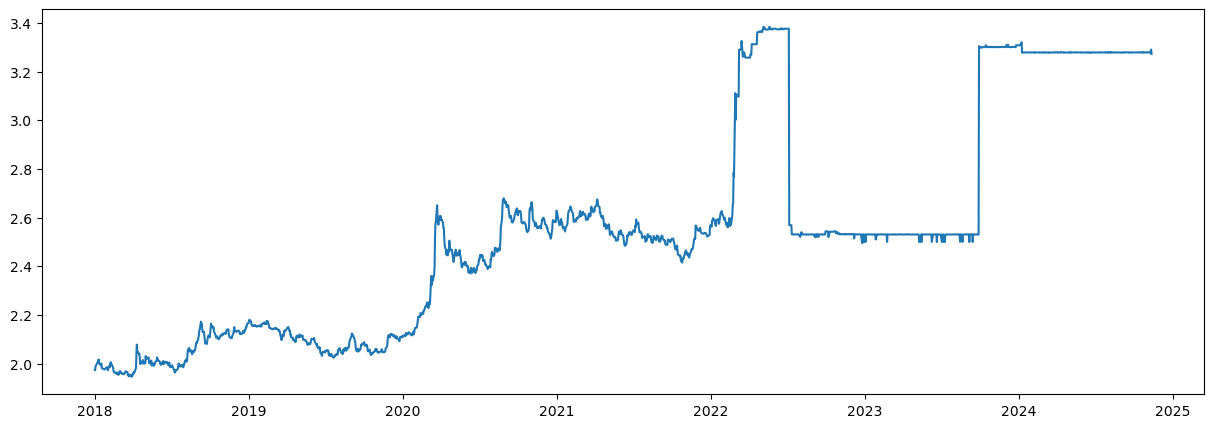

In [476]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Price'])

# plt.xlim(pd.Timestamp('2009-11-01'), pd.Timestamp('2017-1-31'))

# plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  


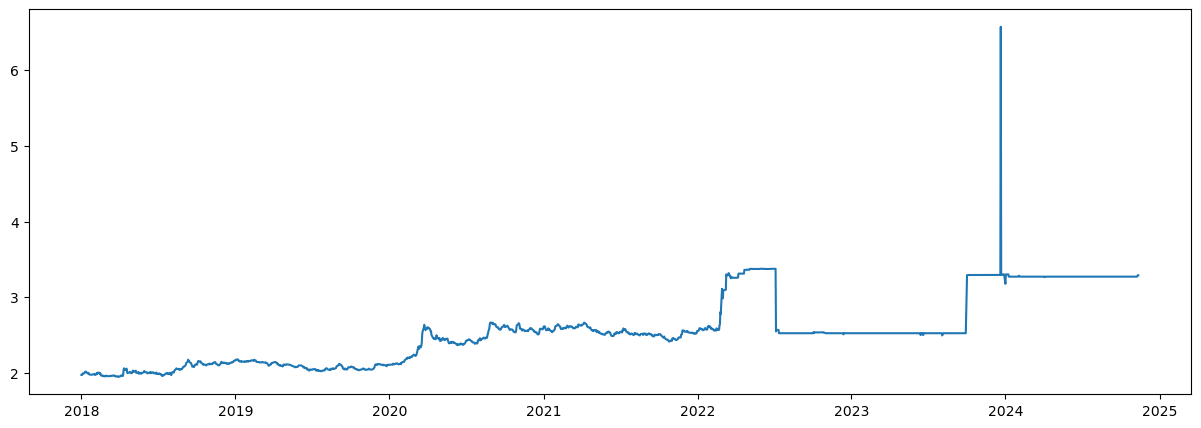

In [477]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Open'])


In [478]:
df[(df['Price']> 2.7) &(df['Date'].dt.year == 2023)]

,Date,Price,Open,High,Low,Vol.,Change %
227,2023-12-29,3.307972,3.301420,3.177629,3.301420,NaN,0.00%
228,2023-12-28,3.307972,3.301420,3.293808,3.306878,NaN,0.00%
229,2023-12-27,3.307972,3.301420,3.293808,3.306878,NaN,0.00%
230,2023-12-26,3.307972,3.294893,3.208213,3.306878,NaN,-0.23%
231,2023-12-25,3.300330,3.298153,3.298153,3.301420,NaN,0.03%
...,...,...,...,...,...,...,...
288,2023-10-05,3.300330,3.293808,3.289474,3.303601,NaN,-0.03%
289,2023-10-04,3.299241,3.292723,3.289474,3.303601,NaN,0.00%
290,2023-10-03,3.299241,3.291639,3.289474,3.307972,NaN,-0.03%
291,2023-10-02,3.298153,3.291639,3.289474,3.307972,NaN,0.20%


In [479]:
df_test = df[(df['Date'] > '2023-08-31')]

In [480]:
df_train = df[(df['Date'] <= '2023-08-31')]

In [481]:
df_train

,Date,Price,Open,High,Low,Vol.,Change %
313,2023-08-31,2.530364,2.524615,2.524615,2.524615,NaN,0.00%
314,2023-08-30,2.530364,2.524615,2.524615,2.524615,NaN,0.03%
315,2023-08-29,2.531005,2.524615,2.524615,2.524615,NaN,-0.03%
316,2023-08-28,2.530364,2.524615,2.524615,2.524615,NaN,0.00%
317,2023-08-25,2.530364,2.524615,2.524615,2.524615,NaN,0.00%
...,...,...,...,...,...,...,...
1787,2018-01-05,1.995211,1.996008,1.981768,2.000000,NaN,-0.18%
1788,2018-01-04,1.991635,1.984127,1.977457,1.991635,NaN,-0.22%
1789,2018-01-03,1.987281,1.984915,1.971998,1.987281,NaN,-0.73%
1790,2018-01-02,1.972776,1.972776,1.972776,1.972776,NaN,0.00%


In [482]:
df = pd.read_csv(eur_byn_path)

In [483]:
df

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,11.11.2024,"3,4889","3,5290","3,5290","3,4889",NaN,"-1,14%"
1,10.11.2024,"3,5290","3,5290","3,5290","3,5290",NaN,"0,81%"
2,08.11.2024,"3,5006","3,5362","3,5364","3,4943",NaN,"-0,80%"
3,07.11.2024,"3,5287","3,5112","3,5426","3,5058",NaN,"0,71%"
4,06.11.2024,"3,5039","3,5773","3,5794","3,4958",NaN,"-1,85%"
...,...,...,...,...,...,...,...
1787,05.01.2018,"2,4000","2,3991","2,4109","2,3919",NaN,"-0,15%"
1788,04.01.2018,"2,4036","2,3915","2,4080","2,3821",NaN,"0,68%"
1789,03.01.2018,"2,3874","2,3820","2,3917","2,3732",NaN,"0,34%"
1790,02.01.2018,"2,3792","2,3702","2,3842","2,3682",NaN,"0,41%"


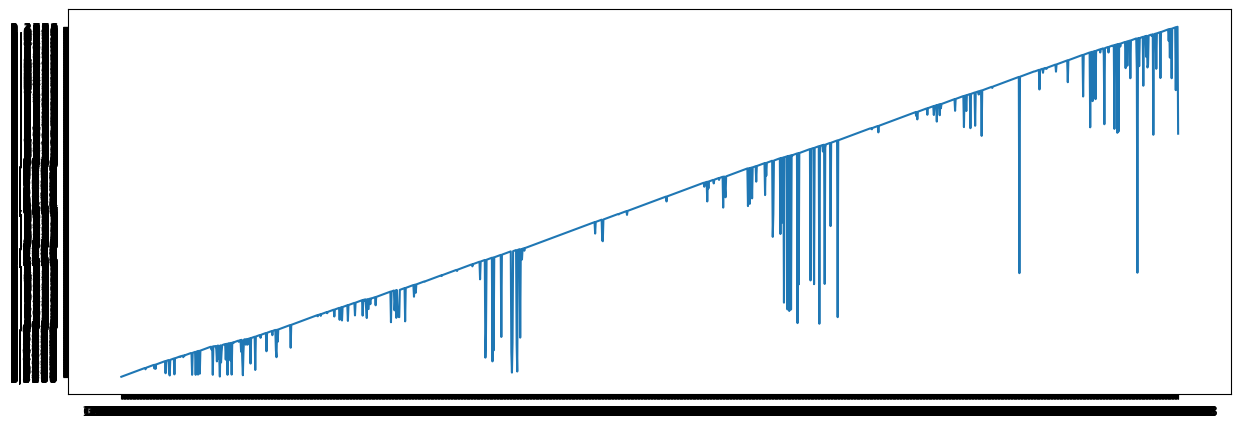

In [484]:
plt.figure(figsize=(15,5))
plt.plot(df['Дата'], df['Цена'])

In [485]:
df['Дата'] = df['Дата'].str.replace('.','-')

In [486]:
df

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,11-11-2024,"3,4889","3,5290","3,5290","3,4889",NaN,"-1,14%"
1,10-11-2024,"3,5290","3,5290","3,5290","3,5290",NaN,"0,81%"
2,08-11-2024,"3,5006","3,5362","3,5364","3,4943",NaN,"-0,80%"
3,07-11-2024,"3,5287","3,5112","3,5426","3,5058",NaN,"0,71%"
4,06-11-2024,"3,5039","3,5773","3,5794","3,4958",NaN,"-1,85%"
...,...,...,...,...,...,...,...
1787,05-01-2018,"2,4000","2,3991","2,4109","2,3919",NaN,"-0,15%"
1788,04-01-2018,"2,4036","2,3915","2,4080","2,3821",NaN,"0,68%"
1789,03-01-2018,"2,3874","2,3820","2,3917","2,3732",NaN,"0,34%"
1790,02-01-2018,"2,3792","2,3702","2,3842","2,3682",NaN,"0,41%"


In [487]:
df['Дата'] = pd.to_datetime(df['Дата'], format="%d-%m-%Y" )


In [488]:
df_sort = df.sort_values('Дата')

In [489]:
df_sort

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
1791,2018-01-01,"2,3696","2,3682","2,3704","2,3666",NaN,"0,10%"
1790,2018-01-02,"2,3792","2,3702","2,3842","2,3682",NaN,"0,41%"
1789,2018-01-03,"2,3874","2,3820","2,3917","2,3732",NaN,"0,34%"
1788,2018-01-04,"2,4036","2,3915","2,4080","2,3821",NaN,"0,68%"
1787,2018-01-05,"2,4000","2,3991","2,4109","2,3919",NaN,"-0,15%"
...,...,...,...,...,...,...,...
4,2024-11-06,"3,5039","3,5773","3,5794","3,4958",NaN,"-1,85%"
3,2024-11-07,"3,5287","3,5112","3,5426","3,5058",NaN,"0,71%"
2,2024-11-08,"3,5006","3,5362","3,5364","3,4943",NaN,"-0,80%"
1,2024-11-10,"3,5290","3,5290","3,5290","3,5290",NaN,"0,81%"


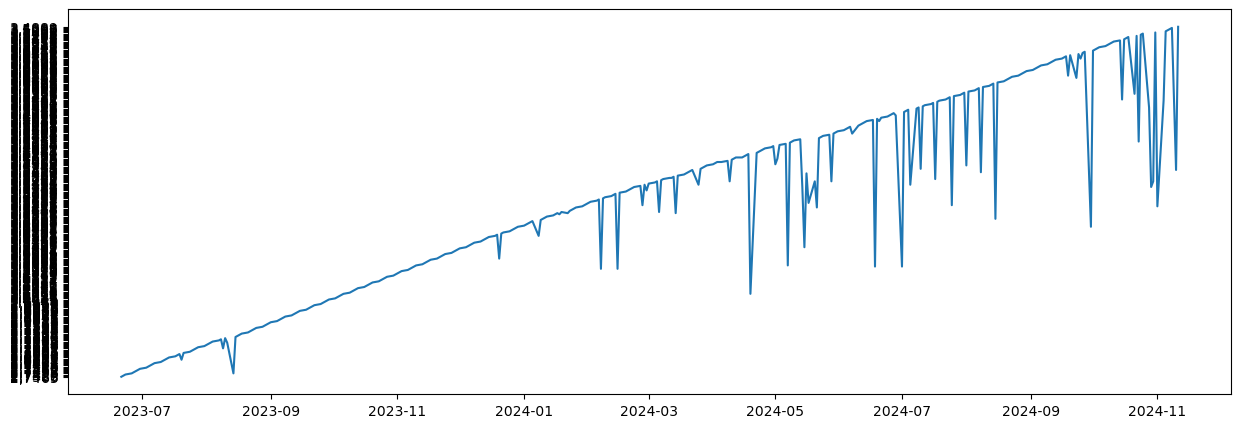

In [490]:
plt.figure(figsize=(15,5))
plt.plot(df_sort['Дата'][-365:], df_sort['Цена'][-365:])

In [491]:
df_sort[-365:]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
364,2023-06-21,"2,7465","2,7559","2,7741","2,7296",NaN,"-0,07%"
363,2023-06-22,"2,7588","2,7466","2,7796","2,7336",NaN,"0,45%"
362,2023-06-23,"2,7420","2,7657","2,7662","2,7154",NaN,"-0,61%"
361,2023-06-26,"2,7457","2,7504","2,7566","2,7203",NaN,"0,13%"
360,2023-06-27,"2,7596","2,7538","2,7708","2,7322",NaN,"0,51%"
...,...,...,...,...,...,...,...
4,2024-11-06,"3,5039","3,5773","3,5794","3,4958",NaN,"-1,85%"
3,2024-11-07,"3,5287","3,5112","3,5426","3,5058",NaN,"0,71%"
2,2024-11-08,"3,5006","3,5362","3,5364","3,4943",NaN,"-0,80%"
1,2024-11-10,"3,5290","3,5290","3,5290","3,5290",NaN,"0,81%"


In [492]:
df1 = pd.read_csv(rub_usd_path)

In [493]:
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%
1,11/10/2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%
2,11/08/2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%
3,11/07/2024,0.01020,0.01017,0.01035,0.01017,NaN,-0.79%
4,11/06/2024,0.01029,0.01053,0.01053,0.00995,NaN,0.60%
...,...,...,...,...,...,...,...
1787,01/05/2018,0.01760,0.01760,0.01760,0.01750,NaN,0.00%
1788,01/04/2018,0.01760,0.01750,0.01760,0.01740,NaN,0.57%
1789,01/03/2018,0.01750,0.01740,0.01750,0.01730,NaN,0.57%
1790,01/02/2018,0.01740,0.01730,0.01750,0.01730,NaN,0.58%


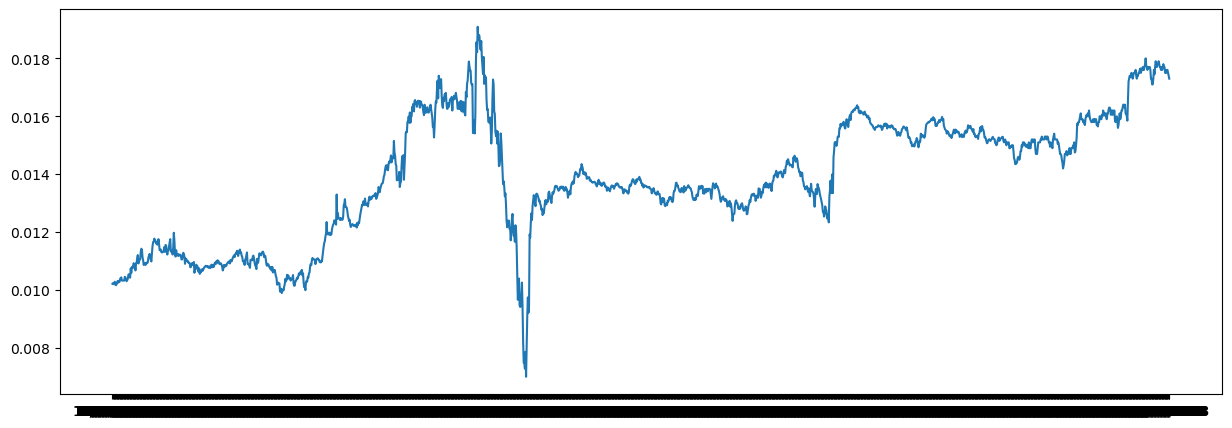

In [494]:
plt.figure(figsize=(15,5))
plt.plot(df1['Date'], df1['Price'])

In [495]:
df2 = pd.read_csv(rub_byn_path)

In [496]:
df2

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,11.11.2024,"0,03413","0,03361","0,03413","0,03321",NaN,"1,53%"
1,10.11.2024,"0,03361","0,03361","0,03361","0,03361",NaN,"-0,37%"
2,08.11.2024,"0,03373","0,03328","0,03387","0,03327",NaN,"1,35%"
3,07.11.2024,"0,03328","0,03359","0,03369","0,03312",NaN,"-0,90%"
4,06.11.2024,"0,03359","0,03336","0,03471","0,03306",NaN,"0,69%"
...,...,...,...,...,...,...,...
2069,05.01.2018,"0,03487","0,03500","0,03502","0,03485",NaN,"-0,44%"
2070,04.01.2018,"0,03503","0,03462","0,03506","0,03462",NaN,"1,15%"
2071,03.01.2018,"0,03463","0,03438","0,03471","0,03425",NaN,"0,76%"
2072,02.01.2018,"0,03437","0,03425","0,03441","0,03425",NaN,"0,18%"


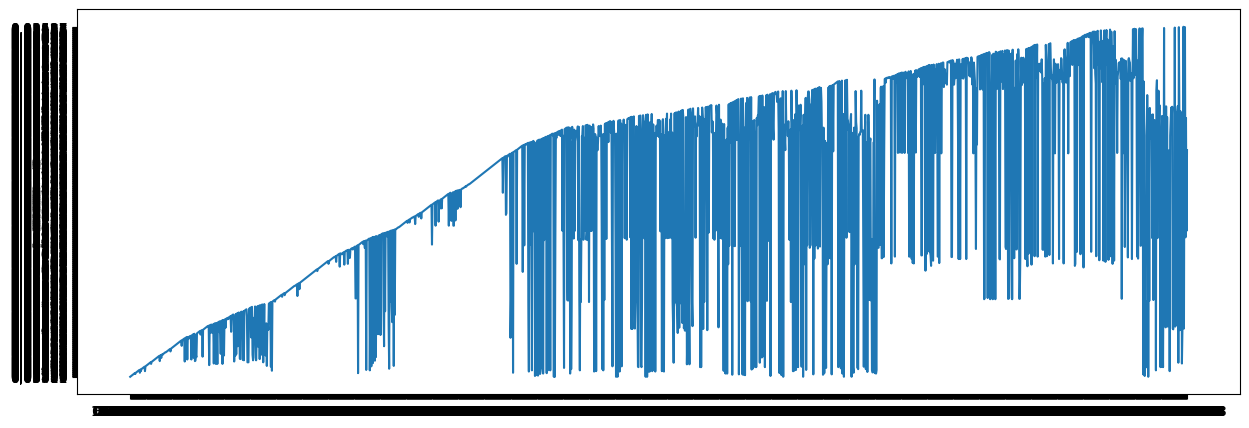

In [497]:
plt.figure(figsize=(15,5))
plt.plot(df2['Дата'], df2['Цена'])

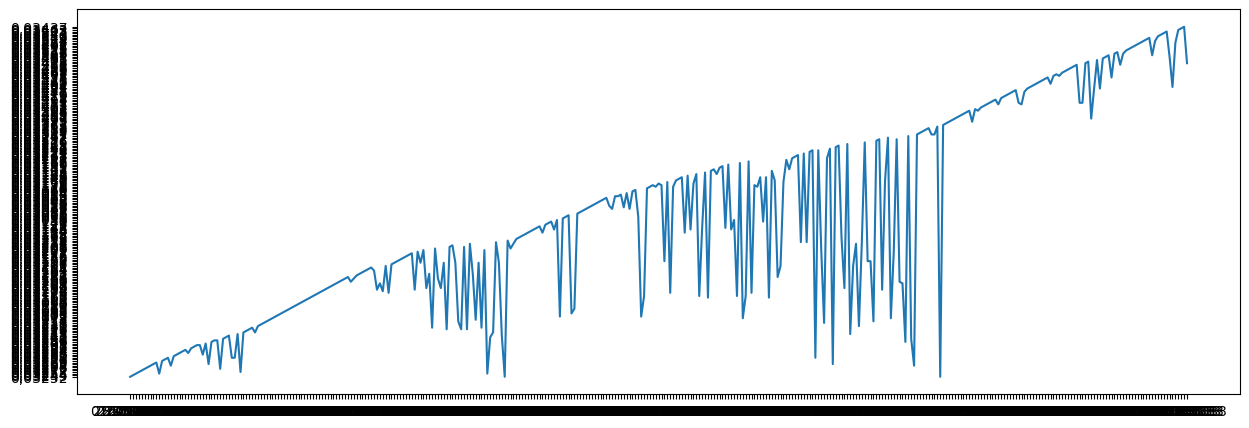

In [498]:
plt.figure(figsize=(15,5))
plt.plot(df2['Дата'][-365:], df2['Цена'][-365:])

In [499]:
df2[-365:]

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
1709,01.03.2019,"0,03252","0,03244","0,03254","0,03236",NaN,"0,21%"
1710,28.02.2019,"0,03245","0,03254","0,03257","0,03243",NaN,"-0,28%"
1711,27.02.2019,"0,03254","0,03253","0,03256","0,03246",NaN,"0,04%"
1712,26.02.2019,"0,03253","0,03271","0,03271","0,03250",NaN,"-0,58%"
1713,25.02.2019,"0,03272","0,03276","0,03279","0,03265",NaN,"-0,14%"
...,...,...,...,...,...,...,...
2069,05.01.2018,"0,03487","0,03500","0,03502","0,03485",NaN,"-0,44%"
2070,04.01.2018,"0,03503","0,03462","0,03506","0,03462",NaN,"1,15%"
2071,03.01.2018,"0,03463","0,03438","0,03471","0,03425",NaN,"0,76%"
2072,02.01.2018,"0,03437","0,03425","0,03441","0,03425",NaN,"0,18%"


In [500]:
!pip install tabula

In [501]:
!pip install PyPDF2

In [502]:
import tabula
import PyPDF2

In [503]:
# dataframe = tabula.read_pdf("Курс RUB.pdf", pages='all')
# dataframe

In [504]:
reader = PyPDF2.PdfReader(rub_pdf_path)
reader

In [505]:
a = reader.pages[0].extract_text()

In [506]:
list_pages = []
for i in reader.pages:
    i = i.extract_text().replace('Курс по ПС Мир  (дата и время МСК)\nЗначение курсов валют ПС «Мир» отражено как количество рублей за 1 единицу иностранной валюты\n', '')
    i = i.replace('Валюта Курс Время применения Дата применения\n', '')
    list_pages.append(i)
    

In [507]:
new_list = []
for i in list_pages:
    i = i.split('\n')
    i = [a.split(' ') for a in i]
    new_list.extend(i)
    
new_list

[['Белорусский', 'рубль', '28.7815', '18.36', '11.11.2024'],
 ['Белорусский', 'рубль', '28.7815', '10.51', '11.11.2024'],
 ['Белорусский', 'рубль', '28.7815', '09.00', '11.11.2024'],
 ['Белорусский', 'рубль', '28.7815', '09.00', '10.11.2024'],
 ['Белорусский', 'рубль', '28.7815', '09.00', '09.11.2024'],
 ['Белорусский', 'рубль', '28.8518', '10.56', '08.11.2024'],
 ['Белорусский', 'рубль', '28.8518', '09.00', '08.11.2024'],
 ['Белорусский', 'рубль', '28.8962', '10.51', '07.11.2024'],
 ['Белорусский', 'рубль', '28.8962', '09.00', '07.11.2024'],
 ['Белорусский', 'рубль', '29.1308', '12.56', '06.11.2024'],
 ['Белорусский', 'рубль', '29.1308', '10.51', '06.11.2024'],
 ['Белорусский', 'рубль', '29.1308', '09.00', '06.11.2024'],
 ['Белорусский', 'рубль', '29.086', '10.56', '05.11.2024'],
 ['Белорусский', 'рубль', '29.086', '09.00', '05.11.2024'],
 ['Белорусский', 'рубль', '29.086', '09.00', '04.11.2024'],
 ['Белорусский', 'рубль', '29.086', '09.00', '03.11.2024'],
 ['Белорусский', 'рубль', '2

In [508]:
df_RUB_BYN = pd.DataFrame(new_list, columns = ['currency1', 'currency2', 'price', 'time', 'date'])

In [509]:
df_RUB_BYN

,currency1,currency2,price,time,date
0,Белорусский,рубль,28.7815,18.36,11.11.2024
1,Белорусский,рубль,28.7815,10.51,11.11.2024
2,Белорусский,рубль,28.7815,09.00,11.11.2024
3,Белорусский,рубль,28.7815,09.00,10.11.2024
4,Белорусский,рубль,28.7815,09.00,09.11.2024
...,...,...,...,...,...
1985,Белорусский,рубль,23.572,09.00,01.09.2022
1986,Белорусский,рубль,23.5689,09.00,31.08.2022
1987,Белорусский,рубль,23.6122,09.00,30.08.2022
1988,Белорусский,рубль,23.5962,10.51,29.08.2022


In [510]:
df_RUB_BYN['date'] = pd.to_datetime(df_RUB_BYN['date'], format="%d.%m.%Y" )

In [511]:
df_RUB_BYN

,currency1,currency2,price,time,date
0,Белорусский,рубль,28.7815,18.36,2024-11-11
1,Белорусский,рубль,28.7815,10.51,2024-11-11
2,Белорусский,рубль,28.7815,09.00,2024-11-11
3,Белорусский,рубль,28.7815,09.00,2024-11-10
4,Белорусский,рубль,28.7815,09.00,2024-11-09
...,...,...,...,...,...
1985,Белорусский,рубль,23.572,09.00,2022-09-01
1986,Белорусский,рубль,23.5689,09.00,2022-08-31
1987,Белорусский,рубль,23.6122,09.00,2022-08-30
1988,Белорусский,рубль,23.5962,10.51,2022-08-29


In [512]:
df_RUB_USD = pd.read_csv(rub_usd_path)

In [513]:
df_RUB_USD

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%
1,11/10/2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%
2,11/08/2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%
3,11/07/2024,0.01020,0.01017,0.01035,0.01017,NaN,-0.79%
4,11/06/2024,0.01029,0.01053,0.01053,0.00995,NaN,0.60%
...,...,...,...,...,...,...,...
1787,01/05/2018,0.01760,0.01760,0.01760,0.01750,NaN,0.00%
1788,01/04/2018,0.01760,0.01750,0.01760,0.01740,NaN,0.57%
1789,01/03/2018,0.01750,0.01740,0.01750,0.01730,NaN,0.57%
1790,01/02/2018,0.01740,0.01730,0.01750,0.01730,NaN,0.58%


In [514]:
df_RUB_USD['Date'] = pd.to_datetime(df_RUB_USD['Date'], format="%m/%d/%Y" )

In [515]:
df_RUB_USD['Date'] = df_RUB_USD['Date'].dt.strftime("%d.%m.%Y")

In [516]:
df_RUB_BYN['date'] = df_RUB_BYN['date'].dt.strftime("%d.%m.%Y")

In [517]:
df_RUB_BYN

,currency1,currency2,price,time,date
0,Белорусский,рубль,28.7815,18.36,11.11.2024
1,Белорусский,рубль,28.7815,10.51,11.11.2024
2,Белорусский,рубль,28.7815,09.00,11.11.2024
3,Белорусский,рубль,28.7815,09.00,10.11.2024
4,Белорусский,рубль,28.7815,09.00,09.11.2024
...,...,...,...,...,...
1985,Белорусский,рубль,23.572,09.00,01.09.2022
1986,Белорусский,рубль,23.5689,09.00,31.08.2022
1987,Белорусский,рубль,23.6122,09.00,30.08.2022
1988,Белорусский,рубль,23.5962,10.51,29.08.2022


In [518]:
df_RUB_USD

,Date,Price,Open,High,Low,Vol.,Change %
0,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%
1,10.11.2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%
2,08.11.2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%
3,07.11.2024,0.01020,0.01017,0.01035,0.01017,NaN,-0.79%
4,06.11.2024,0.01029,0.01053,0.01053,0.00995,NaN,0.60%
...,...,...,...,...,...,...,...
1787,05.01.2018,0.01760,0.01760,0.01760,0.01750,NaN,0.00%
1788,04.01.2018,0.01760,0.01750,0.01760,0.01740,NaN,0.57%
1789,03.01.2018,0.01750,0.01740,0.01750,0.01730,NaN,0.57%
1790,02.01.2018,0.01740,0.01730,0.01750,0.01730,NaN,0.58%


In [519]:
df_RUB_USD

,Date,Price,Open,High,Low,Vol.,Change %
0,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%
1,10.11.2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%
2,08.11.2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%
3,07.11.2024,0.01020,0.01017,0.01035,0.01017,NaN,-0.79%
4,06.11.2024,0.01029,0.01053,0.01053,0.00995,NaN,0.60%
...,...,...,...,...,...,...,...
1787,05.01.2018,0.01760,0.01760,0.01760,0.01750,NaN,0.00%
1788,04.01.2018,0.01760,0.01750,0.01760,0.01740,NaN,0.57%
1789,03.01.2018,0.01750,0.01740,0.01750,0.01730,NaN,0.57%
1790,02.01.2018,0.01740,0.01730,0.01750,0.01730,NaN,0.58%


In [520]:
df_RUB_USD = df_RUB_USD.rename(columns={'Date': 'date'})

In [521]:
df_RUB_USD

,date,Price,Open,High,Low,Vol.,Change %
0,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%
1,10.11.2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%
2,08.11.2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%
3,07.11.2024,0.01020,0.01017,0.01035,0.01017,NaN,-0.79%
4,06.11.2024,0.01029,0.01053,0.01053,0.00995,NaN,0.60%
...,...,...,...,...,...,...,...
1787,05.01.2018,0.01760,0.01760,0.01760,0.01750,NaN,0.00%
1788,04.01.2018,0.01760,0.01750,0.01760,0.01740,NaN,0.57%
1789,03.01.2018,0.01750,0.01740,0.01750,0.01730,NaN,0.57%
1790,02.01.2018,0.01740,0.01730,0.01750,0.01730,NaN,0.58%


In [522]:
df_RUB_BYN

,currency1,currency2,price,time,date
0,Белорусский,рубль,28.7815,18.36,11.11.2024
1,Белорусский,рубль,28.7815,10.51,11.11.2024
2,Белорусский,рубль,28.7815,09.00,11.11.2024
3,Белорусский,рубль,28.7815,09.00,10.11.2024
4,Белорусский,рубль,28.7815,09.00,09.11.2024
...,...,...,...,...,...
1985,Белорусский,рубль,23.572,09.00,01.09.2022
1986,Белорусский,рубль,23.5689,09.00,31.08.2022
1987,Белорусский,рубль,23.6122,09.00,30.08.2022
1988,Белорусский,рубль,23.5962,10.51,29.08.2022


In [523]:
df_RUB_USD_BYN = df_RUB_USD.merge(df_RUB_BYN, on = 'date', how ='inner')

In [524]:
df_RUB_USD_BYN

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time
0,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.7815,18.36
1,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.7815,10.51
2,11.11.2024,0.01022,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.7815,09.00
3,10.11.2024,0.01021,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.7815,09.00
4,08.11.2024,0.01025,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.8518,10.56
...,...,...,...,...,...,...,...,...,...,...,...
1763,01.09.2022,0.01660,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572,09.00
1764,31.08.2022,0.01654,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.5689,09.00
1765,30.08.2022,0.01667,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.6122,09.00
1766,29.08.2022,0.01620,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.5962,10.51


In [525]:
df_RUB_USD_BYN['Price'] = 1/df_RUB_USD_BYN['Price']

In [526]:
df_RUB_USD_BYN['Price'] = df_RUB_USD_BYN['Price'].astype('float32')
df_RUB_USD_BYN['price'] = df_RUB_USD_BYN['price'].astype('float32')

In [527]:
df_RUB_USD_BYN['price_BYN_USD'] = df_RUB_USD_BYN['Price'] / df_RUB_USD_BYN['price']

In [528]:
df_RUB_USD_BYN

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
0,11.11.2024,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,18.36,3.399662
1,11.11.2024,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,10.51,3.399662
2,11.11.2024,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,09.00,3.399662
3,10.11.2024,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991
4,08.11.2024,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,10.56,3.381452
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,01.09.2022,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615
1764,31.08.2022,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223
1765,30.08.2022,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551
1766,29.08.2022,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.51,2.616031


In [529]:
df_RUB_USD_BYN['date']= pd.to_datetime(df_RUB_USD_BYN['date'], format='%d.%m.%Y')

In [530]:
df_RUB_USD_BYN_sort = df_RUB_USD_BYN.sort_values('date')

In [531]:
# df_RUB_USD_BYN = df_RUB_USD_BYN.sort_values(by='date')

In [532]:
df_RUB_USD_BYN_sort

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
1767,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.616031
1766,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.51,2.616031
1765,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551
1764,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223
1763,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,10.56,3.381452
3,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991
2,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,09.00,3.399662
1,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,10.51,3.399662


In [533]:
df_RUB_USD_BYN_sort.tail(20)

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
19,2024-10-30,96.899223,0.01029,0.01035,0.01020,NaN,0.60%,Белорусский,рубль,28.938999,10.56,3.348396
18,2024-10-31,97.370987,0.01032,0.01032,0.01027,NaN,-0.47%,Белорусский,рубль,28.953600,09.00,3.363001
17,2024-10-31,97.370987,0.01032,0.01032,0.01027,NaN,-0.47%,Белорусский,рубль,28.953600,10.56,3.363001
16,2024-11-01,98.039215,0.01030,0.01031,0.01018,NaN,-0.63%,Белорусский,рубль,28.964600,09.00,3.384794
15,2024-11-01,98.039215,0.01030,0.01031,0.01018,NaN,-0.63%,Белорусский,рубль,28.964600,10.51,3.384794
14,2024-11-01,98.039215,0.01030,0.01031,0.01018,NaN,-0.63%,Белорусский,рубль,28.964600,10.56,3.384794
13,2024-11-04,98.328415,0.01027,0.01027,0.01010,NaN,-0.37%,Белорусский,рубль,29.086000,09.00,3.380610
11,2024-11-05,97.847359,0.01017,0.01028,0.01013,NaN,0.57%,Белорусский,рубль,29.086000,10.56,3.364071
12,2024-11-05,97.847359,0.01017,0.01028,0.01013,NaN,0.57%,Белорусский,рубль,29.086000,09.00,3.364071
10,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.336047


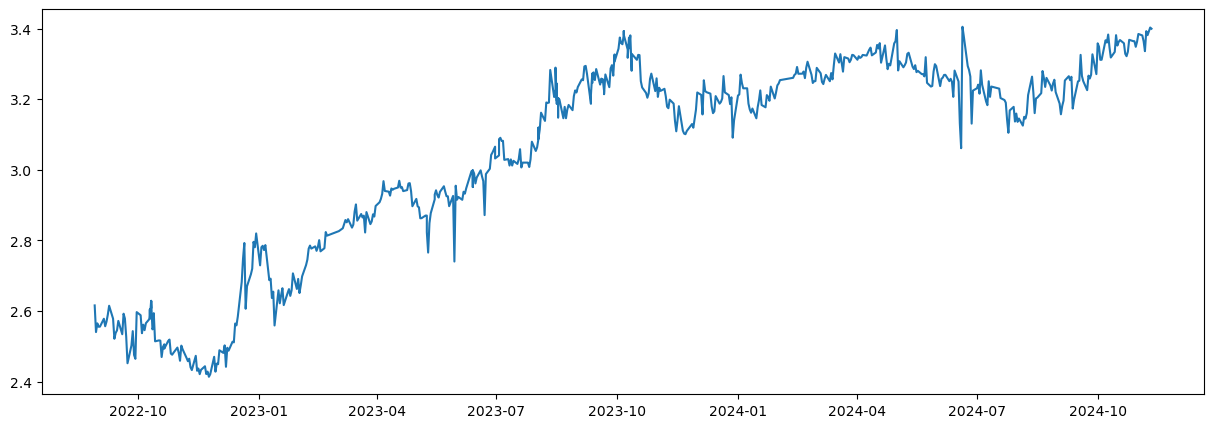

In [534]:
plt.figure(figsize=(15,5))
plt.plot(df_RUB_USD_BYN_sort['date'], df_RUB_USD_BYN_sort['price_BYN_USD'])

In [535]:
df_train = df_RUB_USD_BYN_sort[(df_RUB_USD_BYN_sort['date'] <= '2023-08-31')]
df_test = df_RUB_USD_BYN_sort[(df_RUB_USD_BYN_sort['date'] > '2023-08-31')]

In [536]:
df_train

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
1767,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.616031
1766,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.51,2.616031
1765,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551
1764,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223
1763,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615
...,...,...,...,...,...,...,...,...,...,...,...,...
894,2023-08-30,96.153847,0.01042,0.01047,0.01018,NaN,-0.75%,Белорусский,рубль,29.816000,11.11,3.224908
890,2023-08-31,95.877274,0.01028,0.01049,0.01023,NaN,0.30%,Белорусский,рубль,29.784700,09.00,3.219011
889,2023-08-31,95.877274,0.01028,0.01049,0.01023,NaN,0.30%,Белорусский,рубль,29.784700,10.51,3.219011
888,2023-08-31,95.877274,0.01028,0.01049,0.01023,NaN,0.30%,Белорусский,рубль,29.784700,11.41,3.219011


In [537]:
df_test

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
886,2023-09-01,96.432014,0.01041,0.01051,0.01024,NaN,-0.57%,Белорусский,рубль,29.814800,09.00,3.234367
885,2023-09-01,96.432014,0.01041,0.01051,0.01024,NaN,-0.57%,Белорусский,рубль,29.814800,10.51,3.234367
884,2023-09-04,96.899223,0.01037,0.01045,0.01020,NaN,-0.48%,Белорусский,рубль,29.758699,09.00,3.256165
883,2023-09-04,96.899223,0.01037,0.01045,0.01020,NaN,-0.48%,Белорусский,рубль,29.758699,10.51,3.256165
881,2023-09-04,96.899223,0.01037,0.01045,0.01020,NaN,-0.48%,Белорусский,рубль,29.758699,16.56,3.256165
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,10.56,3.381452
3,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991
2,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,09.00,3.399662
1,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,10.51,3.399662


In [538]:
df_BYN_USD_new = pd.read_csv(curr_path)

In [539]:
df_BYN_USD_new

,Unnamed: 0,date,price
0,0,2024-07-01,3.1662
1,1,2024-07-02,3.1878
2,2,2024-07-03,3.1878
3,3,2024-07-04,3.2090
4,4,2024-07-05,3.2117
...,...,...,...
2869,2869,2022-06-26,2.5315
2870,2870,2022-06-27,2.5315
2871,2871,2022-06-28,2.5280
2872,2872,2022-06-29,2.5221


In [540]:
df_BYN_USD_new['date']= pd.to_datetime(df_BYN_USD_new['date'], format='%Y-%m-%d')

In [541]:
df_BYN_USD_new = df_BYN_USD_new.sort_values('date')

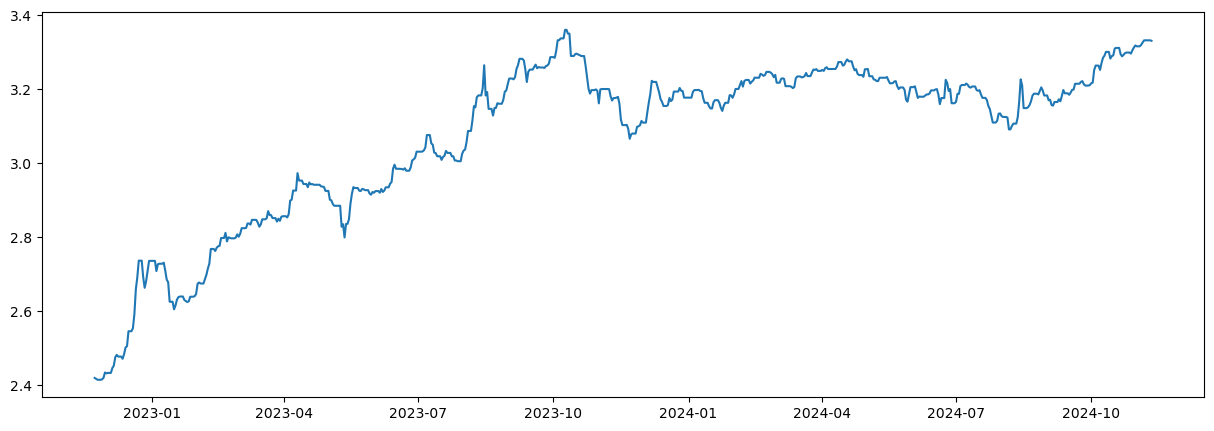

In [542]:
plt.figure(figsize=(15,5))
plt.plot(df_BYN_USD_new['date'][-720:], df_BYN_USD_new['price'][-720:])

In [543]:
df_RUB_USD_BYN_sort = df_RUB_USD_BYN_sort.drop_duplicates(subset=['date'])

In [544]:
df_RUB_USD_BYN_sort.tail()

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
10,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.336047
7,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.392807
5,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.381452
3,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991
2,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,09.00,3.399662


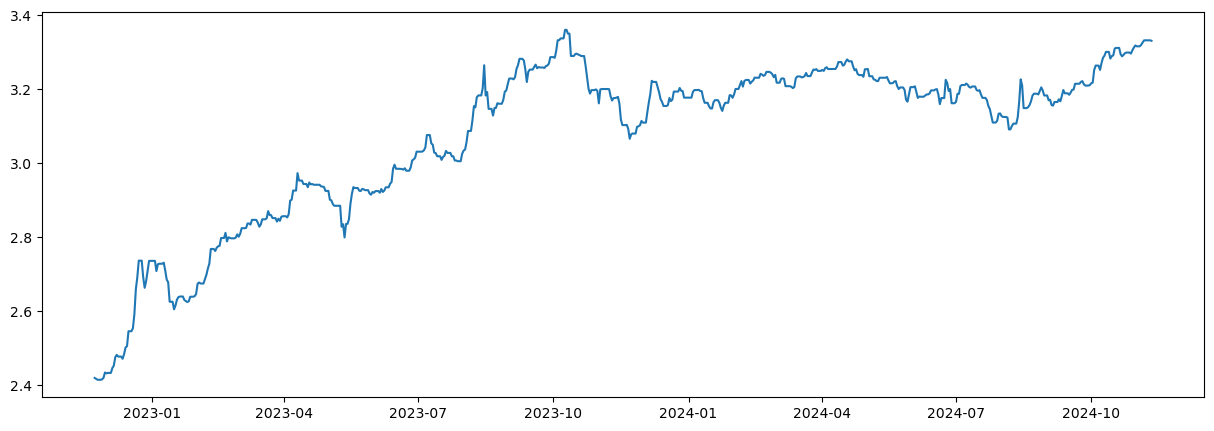

In [545]:
plt.figure(figsize=(15,5))
plt.plot(df_BYN_USD_new['date'][-720:], df_BYN_USD_new['price'][-720:])

In [546]:
df_BYN_USD_new= df_BYN_USD_new.rename(columns={'price': 'price_BYN_USD_new'})

In [547]:
df_BYN_USD_new

,Unnamed: 0,date,price_BYN_USD_new
732,732,2017-01-01,1.9585
733,733,2017-01-02,1.9585
734,734,2017-01-03,1.9585
735,735,2017-01-04,1.9666
736,736,2017-01-05,1.9707
...,...,...,...
1433,1433,2024-11-07,3.3324
1434,1434,2024-11-08,3.3324
1435,1435,2024-11-09,3.3324
1436,1436,2024-11-10,3.3324


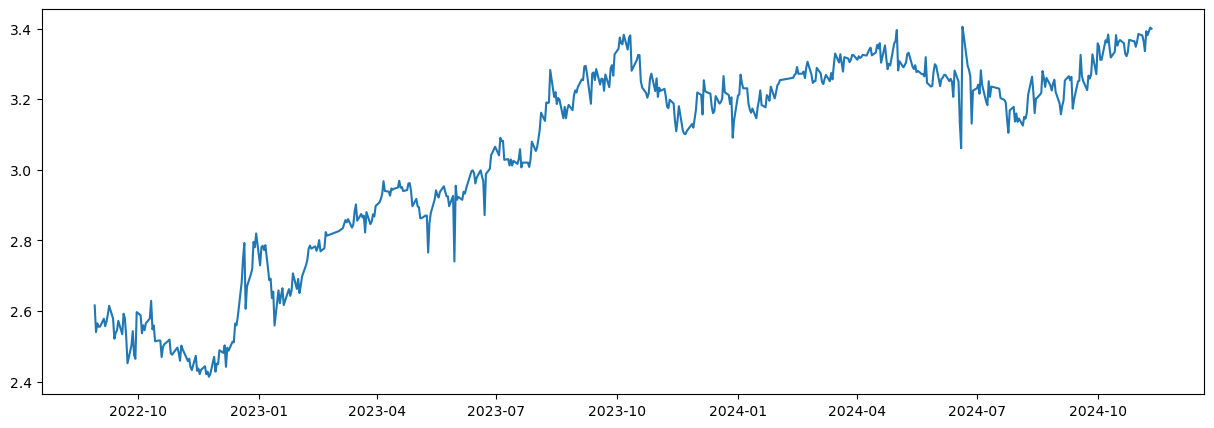

In [548]:
plt.figure(figsize=(15,5))
plt.plot(df_RUB_USD_BYN_sort['date'][-720:], df_RUB_USD_BYN_sort['price_BYN_USD'][-720:])

In [549]:
df_RUB_USD_BYN_merge = df_RUB_USD_BYN_sort.merge(df_BYN_USD_new, on='date', how='inner')

In [550]:
df_RUB_USD_BYN_merge

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD,Unnamed: 0,price_BYN_USD_new
0,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.616031,1424,2.5518
1,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551,1425,2.5586
2,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223,1426,2.5567
3,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615,1957,2.5546
4,2022-09-02,60.313629,0.01633,0.01663,0.01590,NaN,-0.11%,Белорусский,рубль,23.598200,09.00,2.555857,1958,2.5517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.336047,1432,3.3324
557,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.392807,1433,3.3324
558,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.381452,1434,3.3324
559,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991,1436,3.3324


In [551]:
df_RUB_USD_BYN_merge['coef'] = df_RUB_USD_BYN_merge['price_BYN_USD']/df_RUB_USD_BYN_merge['price_BYN_USD_new']

In [552]:
df_RUB_USD_BYN_merge['coef'].describe()

count    561.000000
mean       1.009646
std        0.014699
min        0.940010
25%        1.001191
50%        1.009169
75%        1.018796
max        1.077609
Name: coef, dtype: float64

In [553]:
n = df_RUB_USD_BYN_merge['coef'].to_numpy()

In [554]:
np.percentile(n,25)

1.0011913228265386

In [555]:
for i in range(0,101,1 ):
    print(f'{i} - {np.percentile(n,i)}')

0 - 0.9400096587658616
1 - 0.9706281108650147
2 - 0.9782425414169705
3 - 0.982877481838981
4 - 0.9859197454296308
5 - 0.9866877821932674
6 - 0.9877109895101818
7 - 0.9890000259433783
8 - 0.9907353835205251
9 - 0.9912412924985949
10 - 0.992405232482689
11 - 0.993224871378177
12 - 0.994209604739107
13 - 0.9949460500695915
14 - 0.9961435578835859
15 - 0.9973260933841308
16 - 0.9975450977524778
17 - 0.9979659316930594
18 - 0.9982029500590789
19 - 0.9985995941405045
20 - 0.9991880105626699
21 - 0.9999385871590807
22 - 1.0001530464884
23 - 1.0004728163045855
24 - 1.0007989985864045
25 - 1.0011913228265386
26 - 1.0016303880792832
27 - 1.0020989391088249
28 - 1.0023937315214275
29 - 1.0025941451734421
30 - 1.002699572593501
31 - 1.0030591486906622
32 - 1.0032167567492227
33 - 1.0034002560094986
34 - 1.0036425795250687
35 - 1.0041887097611772
36 - 1.0045640981377715
37 - 1.0047720340028112
38 - 1.0049291370108424
39 - 1.005552907737185
40 - 1.0059422538356624
41 - 1.0067635510959798
42 - 1.0071

In [556]:
df_RUB_USD_BYN_merge

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD,Unnamed: 0,price_BYN_USD_new,coef
0,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.616031,1424,2.5518,1.025171
1,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551,1425,2.5586,0.992946
2,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223,1426,2.5567,1.003334
3,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615,1957,2.5546,1.000397
4,2022-09-02,60.313629,0.01633,0.01663,0.01590,NaN,-0.11%,Белорусский,рубль,23.598200,09.00,2.555857,1958,2.5517,1.001629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.336047,1432,3.3324,1.001095
557,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.392807,1433,3.3324,1.018127
558,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.381452,1434,3.3324,1.014720
559,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991,1436,3.3324,1.021183


In [557]:
df_RUB_USD_BYN_merge['price_BYN_USD'] = df_RUB_USD_BYN_merge['price_BYN_USD']/1.01

In [558]:
df_RUB_USD_BYN_merge.tail()

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD,Unnamed: 0,price_BYN_USD_new,coef
556,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.303017,1432,3.3324,1.001095
557,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.359214,1433,3.3324,1.018127
558,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.347972,1434,3.3324,1.014720
559,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.369298,1436,3.3324,1.021183
560,2024-11-11,97.847359,0.01020,0.01023,0.01014,NaN,0.14%,Белорусский,рубль,28.781500,09.00,3.366002,1437,3.3312,1.020552


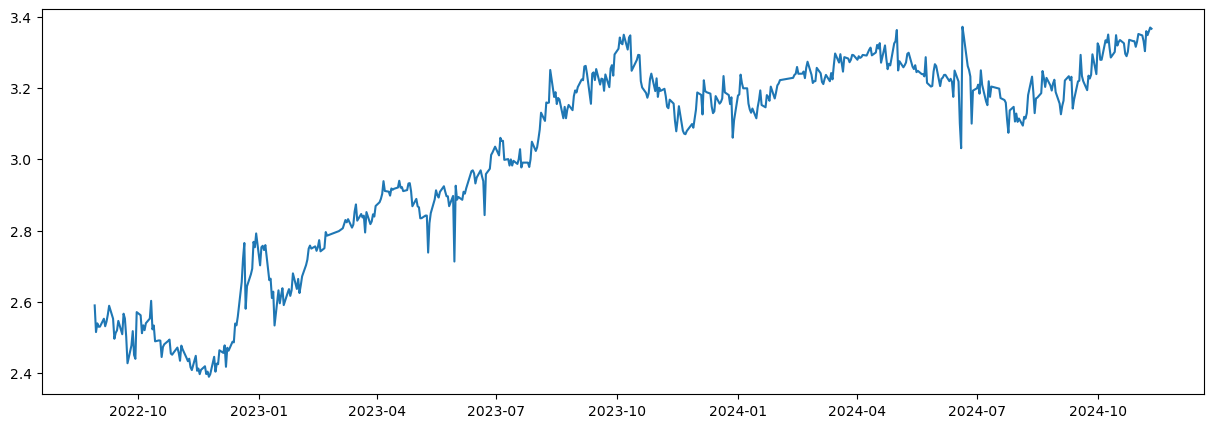

In [559]:
plt.figure(figsize=(15,5))
plt.plot(df_RUB_USD_BYN_merge['date'], df_RUB_USD_BYN_merge['price_BYN_USD'])

In [560]:
df_RUB_USD_BYN_merge['coef'].values

array([1.02517083, 0.99294584, 1.00333378, 1.0003974 , 1.00162914,
       1.0088586 , 0.99336261, 0.99885526, 1.00309975, 1.01619132,
       1.00712928, 0.98697586, 0.99662311, 1.00269957, 1.01583641,
       0.99955278, 1.02143015, 1.01829169, 0.98936579, 0.96349607,
       0.99782029, 1.01956267, 0.99443198, 0.98572864, 1.04707131,
       1.04707131, 1.06502915, 1.03562276, 1.02965233, 1.02500803,
       1.02327501, 1.01662482, 1.03098077, 0.9861002 , 0.99077856,
       0.9781868 , 0.98614542, 0.99811618, 0.98289542, 0.99658587,
       1.0026886 , 1.01068779, 1.0150172 , 1.00119132, 0.99993299,
       1.00292151, 1.00947312, 1.00228665, 0.99386085, 1.0112241 ,
       0.99871798, 0.98890859, 0.98580417, 1.00047289, 0.9931964 ,
       0.98985167, 1.01916898, 1.00280052, 1.00829888, 1.00196686,
       1.00834821, 1.0149652 , 1.00041132, 1.00353342, 0.99852067,
       1.00241676, 1.02250959, 1.00331446, 1.0067225 , 1.00704876,
       1.0227641 , 1.01428085, 1.02022593, 0.98630227, 1.00553

In [561]:
df_RUB_USD_BYN_sort

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
1767,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.616031
1765,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.540551
1764,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.565223
1763,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.555615
1762,2022-09-02,60.313629,0.01633,0.01663,0.01590,NaN,-0.11%,Белорусский,рубль,23.598200,09.00,2.555857
...,...,...,...,...,...,...,...,...,...,...,...,...
10,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.336047
7,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.392807
5,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.381452
3,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.402991


In [562]:
df_RUB_USD_BYN_sort['price_BYN_USD'] = df_RUB_USD_BYN_sort['price_BYN_USD']/1.01

C:\Users\User\AppData\Local\Temp\ipykernel_19140\3162869247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RUB_USD_BYN_sort['price_BYN_USD'] = df_RUB_USD_BYN_sort['price_BYN_USD']/1.01


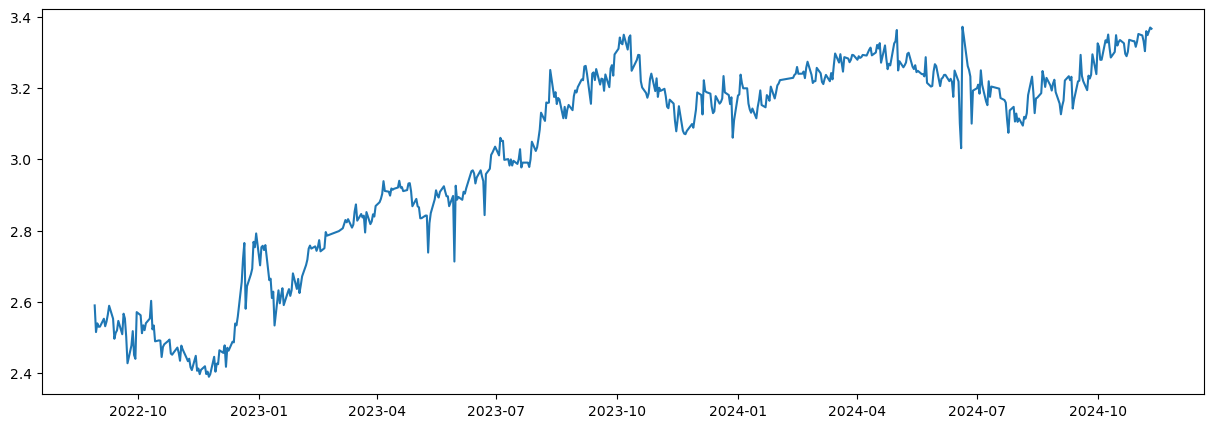

In [563]:
plt.figure(figsize=(15,5))
plt.plot(df_RUB_USD_BYN_sort['date'], df_RUB_USD_BYN_sort['price_BYN_USD'])

### LSTM (df_RUB_USD_BYN_sort)

#### change dataset

In [566]:
start_date = df_RUB_USD_BYN_sort['date'].min()
end_date = df_RUB_USD_BYN_sort['date'].max()

full_dates = pd.date_range(start_date, end_date)
full_df = pd.DataFrame({'date': full_dates})

df_change = pd.merge(full_df, df_RUB_USD_BYN_sort, on='date', how='left')

In [567]:
df_RUB_USD_BYN_sort

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
1767,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.590130
1765,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.515397
1764,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.539825
1763,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.530312
1762,2022-09-02,60.313629,0.01633,0.01663,0.01590,NaN,-0.11%,Белорусский,рубль,23.598200,09.00,2.530552
...,...,...,...,...,...,...,...,...,...,...,...,...
10,2024-11-06,97.181732,0.01053,0.01053,0.00995,NaN,0.60%,Белорусский,рубль,29.130800,09.00,3.303017
7,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.359214
5,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.347972
3,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.369298


In [568]:
df_change['price_BYN_USD'] = df_change['price_BYN_USD'].interpolate(method='linear')

In [569]:
df_change

,date,Price,Open,High,Low,Vol.,Change %,currency1,currency2,price,time,price_BYN_USD
0,2022-08-29,61.728394,0.01610,0.01640,0.01446,NaN,-2.33%,Белорусский,рубль,23.596201,10.47,2.590130
1,2022-08-30,59.988003,0.01588,0.01648,0.01587,NaN,2.90%,Белорусский,рубль,23.612200,09.00,2.515397
2,2022-08-31,60.459492,0.01667,0.01667,0.01594,NaN,-0.79%,Белорусский,рубль,23.568899,09.00,2.539825
3,2022-09-01,60.240963,0.01633,0.01667,0.01606,NaN,0.38%,Белорусский,рубль,23.572001,09.00,2.530312
4,2022-09-02,60.313629,0.01633,0.01663,0.01590,NaN,-0.11%,Белорусский,рубль,23.598200,09.00,2.530552
...,...,...,...,...,...,...,...,...,...,...,...,...
801,2024-11-07,98.039215,0.01017,0.01035,0.01017,NaN,-0.79%,Белорусский,рубль,28.896200,09.00,3.359214
802,2024-11-08,97.560974,0.01021,0.01032,0.01018,NaN,0.40%,Белорусский,рубль,28.851801,09.00,3.347972
803,2024-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.358635
804,2024-11-10,97.943192,0.01020,0.01021,0.01020,NaN,-0.39%,Белорусский,рубль,28.781500,09.00,3.369298


In [570]:
#### here I need to change the dataset

In [571]:
df_for_study = df_RUB_USD_BYN_sort[['date', 'price_BYN_USD']]
# df_for_study = df_change[['date', 'price_BYN_USD']]
df_for_study['price_BYN_USD'] = df_for_study['price_BYN_USD'].astype('float32')

C:\Users\User\AppData\Local\Temp\ipykernel_19140\3143903879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_study['price_BYN_USD'] = df_for_study['price_BYN_USD'].astype('float32')


In [572]:
df_test = df_for_study[df_for_study['date'] >'2024-08-31']
df_train = df_for_study[df_for_study['date'] <='2024-08-31']

In [573]:
df_for_study = df_for_study.set_index('date')

In [574]:
test_data= df_test.set_index('date')
train_data= df_train.set_index('date')

In [575]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Number of time steps to look back

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Create sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

In [689]:
X_train.shape

(496, 12, 1)

In [296]:
!pip install optuna-integration[keras]

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/97.4 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/97.4 kB ? eta -:--:--
   ------------------------- -------------- 61.4/97.4 kB 1.7 MB/s eta 0:00:01
   ------------------------- -------------- 61.4/97.4 kB 1.7 MB/s eta 0:00:01
   ------------------------- -------------- 61.4/97.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 97.4/97.4 kB 506.9 kB/s eta 0:00:00


In [294]:
run = neptune.init_run(
    project="alyonkaiselyonok/optuna",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiOTRlOTQwNi1iMWQ3LTQ4MDQtODkyMy00Y2ZlNDMyZDI0MTYifQ==",
)
neptune_callback = optuna_utils.NeptuneCallback(run)

[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/alyonkaiselyonok/optuna/e/OP-22


In [301]:
import optuna
from optuna.integration import KerasPruningCallback
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam

def objective(trial):

    learning_rate = trial.suggest_float('learning_rate', 0.0005, 0.1, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.3)
    units_1 = trial.suggest_int('units_1', 64, 512)
    units_2 = trial.suggest_int('units_2', 32, 256)
    units_3 = trial.suggest_int('units_3', 32, 256)

    
    model = models.Sequential()
    model.add(LSTM(units_1, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) 
    model.add(LSTM(units_2, return_sequences=False))
    model.add(Dense(units_3))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
    )


    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train, 
        epochs=25,  
        callbacks=[KerasPruningCallback(trial, 'val_loss'), early_stopping],
        verbose=1
    )

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)


    mse = mean_squared_error( test_data[:40],test_predictions)

    run['parameters/learning_rate'].log(learning_rate)
    run['parameters/dropout_rate'].log(dropout_rate)
    run['parameters/units_1'].log(units_1)
    run['parameters/units_2'].log(units_2)
    run['parameters/units_3'].log(units_3)
    run['metrics/mse'].log(mse)
    
    return mse

study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=20)

print(f"Best trial: {study.best_trial}")
print(f"  Value: {study.best_value}")
print(f"  Params: {study.best_params}")

# Get the best hyperparameters
best_learning_rate = study.best_params['learning_rate']
best_dropout_rate = study.best_params['dropout_rate']
best_units_1 = study.best_params['units_1']
best_units_2 = study.best_params['units_2']
best_units_3 = study.best_params['units_3']

# Create the final model with best hyperparameters
best_model = models.Sequential()
best_model.add(LSTM(best_units_1, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) 
best_model.add(LSTM(best_units_2, return_sequences=False))
best_model.add(Dense(best_units_3))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(1))

best_model.compile(
    optimizer=Adam(learning_rate=best_learning_rate),
    loss='mse',
)


best_model.fit(
    X_test, y_test, 
    epochs=25,  
    verbose=1
)

[I 2024-11-12 21:48:05,664] A new study created in memory with name: no-name-7655fd61-0a96-413a-bbf0-e9b2f12f595d


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 599.0756
Epoch 2/25
 2/16 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 53.4991

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 23.8987
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 4.9065
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.2389
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.5264
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.2729
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2295
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1817
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1599
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1370
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1376
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1170
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1133
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1073
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0992
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0980
Epoch 17/25
1

[I 2024-11-12 21:48:35,043] Trial 0 finished with value: 0.15900857746601105 and parameters: {'learning_rate': 0.05388856456389527, 'dropout_rate': 0.10110991281467765, 'units_1': 400, 'units_2': 191, 'units_3': 90}. Best is trial 0 with value: 0.15900857746601105.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.1453
Epoch 2/25
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0087

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0081
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0054
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0048
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0043
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0038
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0041
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0039
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0033
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0036
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0036
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0047
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0051
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0040
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0039
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0038
Epoch 17/25
16

[I 2024-11-12 21:49:11,069] Trial 1 finished with value: 0.0021697203628718853 and parameters: {'learning_rate': 0.0016465750112445716, 'dropout_rate': 0.26432559016401463, 'units_1': 479, 'units_2': 187, 'units_3': 168}. Best is trial 1 with value: 0.0021697203628718853.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2203
Epoch 2/25
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0128

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0038
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0028
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0026
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0025
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0026
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0021
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0025
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0021
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024
Epoch 17/25
16

[I 2024-11-12 21:49:25,130] Trial 2 finished with value: 0.003186239628121257 and parameters: {'learning_rate': 0.0008173937818216589, 'dropout_rate': 0.004856299218277527, 'units_1': 122, 'units_2': 223, 'units_3': 204}. Best is trial 1 with value: 0.0021697203628718853.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1459
Epoch 2/25
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0034
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0037
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0032
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0032
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0030
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029
Epoch 17/25
16

[I 2024-11-12 21:49:38,091] Trial 3 finished with value: 0.003134095575660467 and parameters: {'learning_rate': 0.0026278970369030493, 'dropout_rate': 0.1726008219105147, 'units_1': 106, 'units_2': 216, 'units_3': 158}. Best is trial 1 with value: 0.0021697203628718853.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3656
Epoch 2/25
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0429

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0391
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0165
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0082
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0112
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0068
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0058
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0058
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0045
Epoch 17/25
16

[I 2024-11-12 21:49:50,582] Trial 4 finished with value: 0.0019576523918658495 and parameters: {'learning_rate': 0.016710366540232162, 'dropout_rate': 0.28601711833571636, 'units_1': 111, 'units_2': 138, 'units_3': 32}. Best is trial 4 with value: 0.0019576523918658495.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 194.5216
Epoch 2/25
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6780

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.3308
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6260
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1059
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0502
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0323
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0096
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092
Epoch 17/25
16

[I 2024-11-12 21:50:04,092] Trial 5 finished with value: 0.0021877542603760958 and parameters: {'learning_rate': 0.040391627718435796, 'dropout_rate': 0.1779321414238455, 'units_1': 166, 'units_2': 126, 'units_3': 72}. Best is trial 4 with value: 0.0019576523918658495.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 933.6818
Epoch 2/25
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.0074

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 65.2626
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 7.9822
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.5715
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.5548
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.4317
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.9556
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.5529
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.4341
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3957
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3038
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2425
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1775
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1769
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1412
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1588
Epoch 17/25
1

[I 2024-11-12 21:50:25,189] Trial 6 finished with value: 0.03819529339671135 and parameters: {'learning_rate': 0.03560507298726267, 'dropout_rate': 0.08459241488265286, 'units_1': 185, 'units_2': 246, 'units_3': 125}. Best is trial 4 with value: 0.0019576523918658495.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 1.0241
Epoch 2/25
 2/16 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0463 

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0271
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0084
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0033
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0036
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0029
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0029
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0024
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0031
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0030
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0028
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0034
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0026
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0024
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0028
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0024
Epoch 17/25
16

[I 2024-11-12 21:50:57,681] Trial 7 finished with value: 0.002973958384245634 and parameters: {'learning_rate': 0.007927430977645181, 'dropout_rate': 0.05804822809211328, 'units_1': 420, 'units_2': 200, 'units_3': 160}. Best is trial 4 with value: 0.0019576523918658495.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1996
Epoch 2/25
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0220

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0045
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0042
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0030
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027
Epoch 17/25
16

[I 2024-11-12 21:51:12,589] Trial 8 finished with value: 0.0015876231482252479 and parameters: {'learning_rate': 0.002570862482908736, 'dropout_rate': 0.18377402255483766, 'units_1': 212, 'units_2': 84, 'units_3': 216}. Best is trial 8 with value: 0.0015876231482252479.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3862
Epoch 2/25
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0680

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0575
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0062
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0048
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0048
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0039
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0032
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0026
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0027
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033
Epoch 17/25
16

[I 2024-11-12 21:51:28,806] Trial 9 finished with value: 0.002213424537330866 and parameters: {'learning_rate': 0.007111244882796928, 'dropout_rate': 0.06683892473888849, 'units_1': 180, 'units_2': 149, 'units_3': 160}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.2826
Epoch 2/25
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0285

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0083
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0046
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0046
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0048
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0044
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0053
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0045
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0047
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0040
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041
Epoch 17/25
16

[I 2024-11-12 21:51:46,848] Trial 10 finished with value: 0.0028372446540743113 and parameters: {'learning_rate': 0.0005175224072190368, 'dropout_rate': 0.22391484714610782, 'units_1': 308, 'units_2': 43, 'units_3': 233}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.3089
Epoch 2/25
 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1170

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1090
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0547
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0196
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0120
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0119
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0131
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0096
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0095
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0099
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0102
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0083
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0078
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105
Epoch 17/25
16

[I 2024-11-12 21:52:02,449] Trial 11 finished with value: 0.0048246062360703945 and parameters: {'learning_rate': 0.016558424574273107, 'dropout_rate': 0.29289437477704183, 'units_1': 268, 'units_2': 80, 'units_3': 32}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.1571
Epoch 2/25
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0031
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0031
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 17/25
16

[I 2024-11-12 21:52:25,886] Trial 12 finished with value: 0.002775390399619937 and parameters: {'learning_rate': 0.002248850188456374, 'dropout_rate': 0.22596250233123008, 'units_1': 64, 'units_2': 107, 'units_3': 246}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 4.5901
Epoch 2/25
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1781

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1395
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0527
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0043
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0040
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0047
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0037
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0037
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0031
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0027
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0032
Epoch 17/25
16

[I 2024-11-12 21:52:42,621] Trial 13 finished with value: 0.0023532165214419365 and parameters: {'learning_rate': 0.01624919472544015, 'dropout_rate': 0.13142110769922555, 'units_1': 280, 'units_2': 76, 'units_3': 198}. Best is trial 8 with value: 0.0015876231482252479.


Epoch 1/25


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2876
Epoch 2/25
 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0318

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0243
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0070
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0043
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0040
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0040
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0039
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0039
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0043
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0042
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0031
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041
Epoch 17/25
16

[I 2024-11-12 21:52:58,232] Trial 14 finished with value: 0.0018792760092765093 and parameters: {'learning_rate': 0.0038883545504947046, 'dropout_rate': 0.21740306494141493, 'units_1': 225, 'units_2': 145, 'units_3': 113}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3703
Epoch 2/25
 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0480

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0372
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0080
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0059
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0039
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0045
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0036
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0038
Epoch 17/25
16

[I 2024-11-12 21:53:15,726] Trial 15 finished with value: 0.00218106503598392 and parameters: {'learning_rate': 0.003976944652103607, 'dropout_rate': 0.21880240779263954, 'units_1': 236, 'units_2': 160, 'units_3': 121}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2394
Epoch 2/25
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0397

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0251
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0057
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0046
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0046
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0044
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0042
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0040
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0043
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0046
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0041
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0041
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0034
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034
Epoch 17/25
16

[I 2024-11-12 21:53:37,455] Trial 16 finished with value: 0.0017149664927273989 and parameters: {'learning_rate': 0.0011510560688179647, 'dropout_rate': 0.1860280476106912, 'units_1': 355, 'units_2': 32, 'units_3': 197}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2432
Epoch 2/25
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0412

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0308
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0058
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0047
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0038
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0033
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0032
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0038
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0035
Epoch 17/25
16

[I 2024-11-12 21:53:56,926] Trial 17 finished with value: 0.0016254615038633347 and parameters: {'learning_rate': 0.001145998275838539, 'dropout_rate': 0.15285951450083463, 'units_1': 347, 'units_2': 32, 'units_3': 204}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.2123
Epoch 2/25
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0288

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0170
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0051
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0044
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0039
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0036
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0037
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0036
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0029
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0033
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0027
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0032
Epoch 17/25
16

[I 2024-11-12 21:54:15,836] Trial 18 finished with value: 0.0040244972333312035 and parameters: {'learning_rate': 0.0008864188342103682, 'dropout_rate': 0.1344292657651625, 'units_1': 335, 'units_2': 62, 'units_3': 219}. Best is trial 8 with value: 0.0015876231482252479.
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1616
Epoch 2/25
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0242

C:\Users\Алёна\AppData\Roaming\Python\Python312\site-packages\optuna_integration\keras\keras.py:58: UserWarning: The metric 'val_loss' is not in the evaluation logs for pruning. Please make sure you set the correct metric name.
  warnings.warn(message)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0144
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0042
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0040
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0048
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0036
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0034
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0034
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0042
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0034
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0036
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0039
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0038
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032
Epoch 16/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0036
Epoch 17/25
16

[I 2024-11-12 21:54:39,397] Trial 19 finished with value: 0.0021617163438349962 and parameters: {'learning_rate': 0.001540139937562241, 'dropout_rate': 0.14909329877279415, 'units_1': 391, 'units_2': 89, 'units_3': 185}. Best is trial 8 with value: 0.0015876231482252479.


Best trial: FrozenTrial(number=8, state=1, values=[0.0015876231482252479], datetime_start=datetime.datetime(2024, 11, 12, 21, 50, 57, 682344), datetime_complete=datetime.datetime(2024, 11, 12, 21, 51, 12, 588523), params={'learning_rate': 0.002570862482908736, 'dropout_rate': 0.18377402255483766, 'units_1': 212, 'units_2': 84, 'units_3': 216}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0005, step=None), 'dropout_rate': FloatDistribution(high=0.3, log=False, low=0.0, step=None), 'units_1': IntDistribution(high=512, log=False, low=64, step=1), 'units_2': IntDistribution(high=256, log=False, low=32, step=1), 'units_3': IntDistribution(high=256, log=False, low=32, step=1)}, trial_id=8, value=None)
  Value: 0.0015876231482252479
  Params: {'learning_rate': 0.002570862482908736, 'dropout_rate': 0.18377402255483766, 'units_1': 212, 'units_2': 84, 'units_3': 216}


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'trial' is not defined

In [317]:
run.stop()

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/alyonkaiselyonok/optuna/e/OP-22/metadata


In [332]:
best_learning_rate = study.best_params['learning_rate']
best_dropout_rate = study.best_params['dropout_rate']
best_units_1 = study.best_params['units_1']
best_units_2 = study.best_params['units_2']
best_units_3 = study.best_params['units_3']

In [304]:
print(f' best_learning_rate: {best_learning_rate}')
print(f' best_dropout_rate: {best_dropout_rate}')
print(f' best_units_1: {best_units_1}')
print(f' best_units_2: {best_units_2}')
print(f' best_units_3: {best_units_3}')

 best_learning_rate: 0.002570862482908736
 best_dropout_rate: 0.18377402255483766
 best_units_1: 212
 best_units_2: 84
 best_units_3: 216


In [691]:
best_model = models.Sequential()
best_model.add(LSTM(212, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) 
best_model.add(LSTM(84, return_sequences=False))
best_model.add(Dense(216))
best_model.add(Dropout(0.18))
best_model.add(Dense(1))

best_model.compile(
    optimizer=Adam(learning_rate=0.00257086),
    loss='mse',
)


best_model.fit(
    X_test, y_test, 
    epochs=25,  
    verbose=1
)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7598
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0353
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0176  
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1042
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0351
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0247
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0290
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0177
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0183
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0113
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0023 
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━

In [692]:
X_train.shape

(496, 12, 1)

In [693]:
model1 = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True), 
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse')

model1.fit(X_train, y_train, epochs=25, verbose=1)

# loss = model1.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}')

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1857
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0116
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029
Epoch 10/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027
Epoch 11/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027
Epoch 12/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028
Epoch 13/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028
Epoch 14/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 15/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024
Epoch 16/25
16/16 

In [694]:
train_predictions = model1.predict(X_train)
test_predictions = model1.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [695]:
train_predictions.shape

(496, 1)

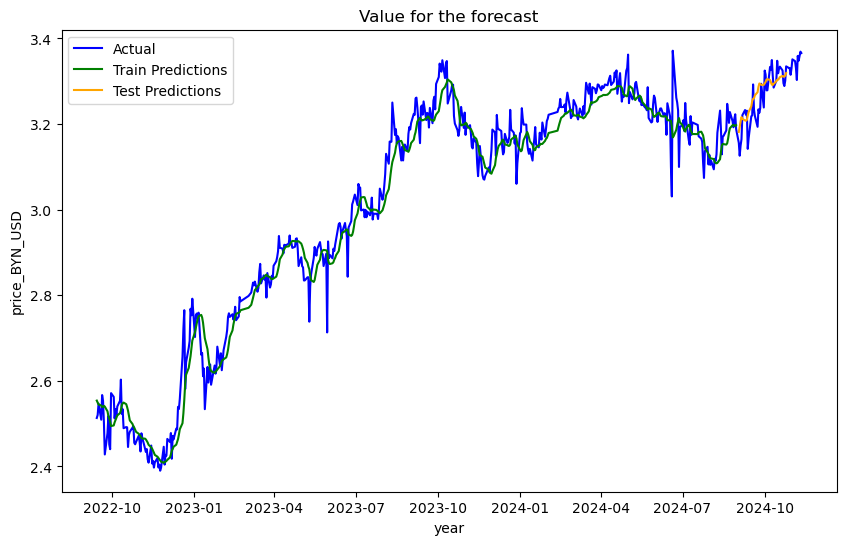

In [696]:

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


plt.figure(figsize=(10, 6))

plt.plot(df_for_study.index[seq_length:], df_for_study['price_BYN_USD'][seq_length:], label='Actual', color='blue')

plt.plot(df_for_study.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Train Predictions',color='green')

test_pred_index = range(seq_length+len(train_predictions), seq_length+len(train_predictions)+len(test_predictions))
plt.plot(df_for_study.index[test_pred_index], test_predictions, label='Test Predictions',color='orange')

plt.title('Value for the forecast')
plt.xlabel('year')
plt.ylabel('price_BYN_USD')
plt.legend()
plt.show()

In [697]:
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


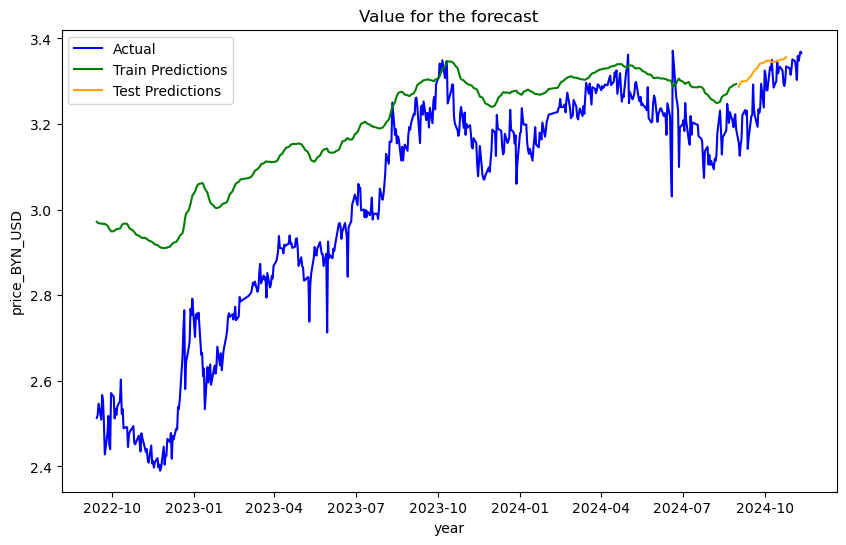

In [698]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


plt.figure(figsize=(10, 6))

plt.plot(df_for_study.index[seq_length:], df_for_study['price_BYN_USD'][seq_length:], label='Actual', color='blue')

plt.plot(df_for_study.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Train Predictions',color='green')

test_pred_index = range(seq_length+len(train_predictions), seq_length+len(train_predictions)+len(test_predictions))
plt.plot(df_for_study.index[test_pred_index], test_predictions, label='Test Predictions',color='orange')

plt.title('Value for the forecast')
plt.xlabel('year')
plt.ylabel('price_BYN_USD')
plt.legend()
plt.show()

#### changing dataset

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


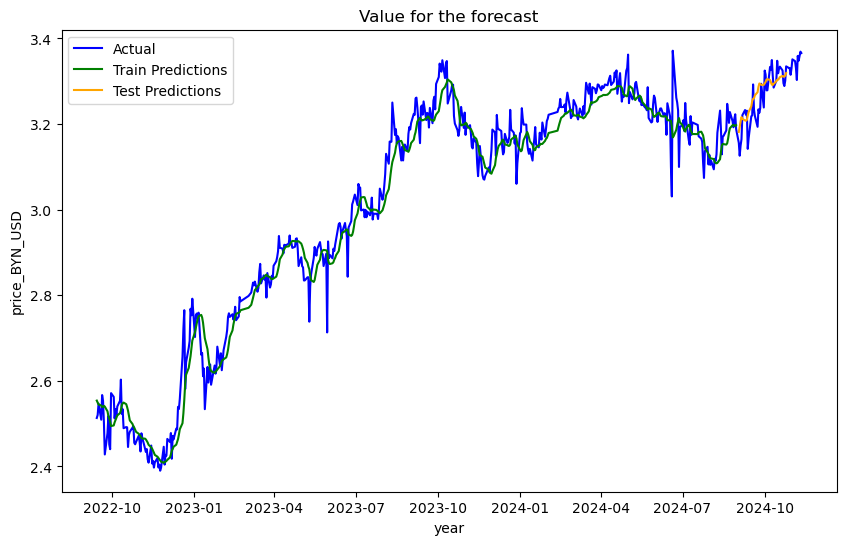

In [700]:
train_predictions = model1.predict(X_train)
test_predictions = model1.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


plt.figure(figsize=(10, 6))

plt.plot(df_for_study.index[seq_length:], df_for_study['price_BYN_USD'][seq_length:], label='Actual', color='blue')

plt.plot(df_for_study.index[seq_length:seq_length+len(train_predictions)], train_predictions, label='Train Predictions',color='green')

test_pred_index = range(seq_length+len(train_predictions), seq_length+len(train_predictions)+len(test_predictions))
plt.plot(df_for_study.index[test_pred_index], test_predictions, label='Test Predictions',color='orange')

plt.title('Value for the forecast')
plt.xlabel('year')
plt.ylabel('price_BYN_USD')
plt.legend()
plt.show()

In [701]:
test_data = scaler.inverse_transform(test_data)

In [702]:
test_data

array([[3.156117 ],
       [3.1260736],
       [3.1496236],
       [3.1644897],
       [3.2207825],
       [3.232829 ],
       [3.2217205],
       [3.2312102],
       [3.1421213],
       [3.1670797],
       [3.2183528],
       [3.2201064],
       [3.2926507],
       [3.233321 ],
       [3.2189898],
       [3.1936772],
       [3.2344513],
       [3.2263882],
       [3.237084 ],
       [3.2941828],
       [3.238737 ],
       [3.3250318],
       [3.3156834],
       [3.2787707],
       [3.2789493],
       [3.333594 ],
       [3.3271692],
       [3.3496296],
       [3.3135   ],
       [3.285254 ],
       [3.3009388],
       [3.3479207],
       [3.3187428],
       [3.3289902],
       [3.3342016],
       [3.3251905],
       [3.2955627],
       [3.2889166],
       [3.301544 ],
       [3.3348618],
       [3.3312516],
       [3.3308785],
       [3.3152435],
       [3.329704 ],
       [3.3512816],
       [3.3471384],
       [3.330763 ],
       [3.3030174],
       [3.3592143],
       [3.3479722],


In [703]:
test_data.shape

(52, 1)

In [704]:
test_predictions.shape

(40, 1)

In [764]:
mse1 = mean_squared_error( test_data[12:],test_predictions)
mae1 = mean_absolute_error(test_data[12:], test_predictions)

In [766]:
print(mse1)
print(mae1)

0.0020343163
0.037379067


### best values

In [768]:
mse1 = mean_squared_error( test_data[12:],test_predictions)
mae1 = mean_absolute_error(test_data[12:], test_predictions)

In [770]:
print(mse1)
print(mae1)

0.0020343163
0.037379067


### losses

In [772]:
(test_data[12:] - test_predictions).mean()

0.03412314

In [712]:
print(mse1)
print(mae1)

0.0015217677
0.03301354


## F1 Score

In [754]:
real_diff = np.diff(test_data.flatten())
real_diff[12:].shape
real_diff_ = real_diff[12:]
real_diff_
real_diff_bin = list(map(lambda x: 0 if x<0 else 1, real_diff_))
real_diff_bin = np.array(real_diff_bin)
real_diff_bin

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [758]:
test_diff = np.diff(test_predictions.flatten())
test_diff.shape
test_diff_bin = list(map(lambda x: 0 if x<0 else 1, test_diff))
test_diff_bin = np.array(test_diff_bin)
test_diff_bin

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [760]:
from sklearn.metrics import f1_score

In [762]:
f1 = f1_score(real_diff_bin, test_diff_bin)
f1

0.4347826086956522